<a href="https://colab.research.google.com/github/sanjanams742/sanjanams742/blob/main/project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Hand Written Digit Prediction- Classification Analysis
The digits dataset consists of 8x8 pixel images of digits.The image attribute of the dataset stores 8x8 arrays of grayscale values for each image. we will use these arrays to visualize the first 4 images.The target attribute of the dataset stores the digit each image represents

  IMPORT LIBRARY

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import dataset
from sklearn.datasets import load_digits
df=load_digits()

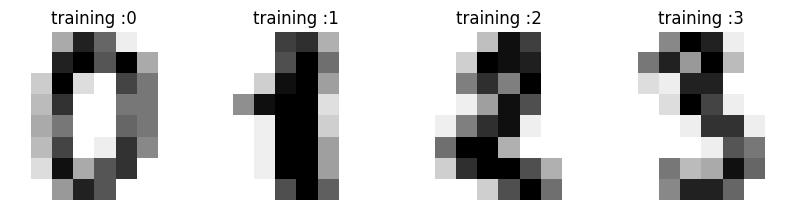

In [4]:
_, axes = plt.subplots(nrows=1,ncols=4,figsize=(10,3))
for ax, image, label in zip(axes, df.images, df.target):
  ax.set_axis_off()
  ax.imshow(image,cmap=plt.cm.gray_r,interpolation="nearest")
  ax.set_title("training :%i" %label)

Data Preprocessing

Flatten image


In [5]:
df.images.shape

(1797, 8, 8)

In [6]:
df.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [7]:
df.images[0].shape

(8, 8)

In [8]:
len(df.images)

1797

In [10]:
n_samples=len(df.images)
data=df.images.reshape(n_samples,-1)
data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [11]:
data[0].shape

(64,)

In [12]:
data.shape

(1797, 64)

scaling image data

In [13]:
data.min()

0.0

In [14]:
data.max()

16.0

In [15]:
data=data/16

In [16]:
data.min()

0.0

In [17]:
data.max()

1.0

In [18]:
data[0]

array([0.    , 0.    , 0.3125, 0.8125, 0.5625, 0.0625, 0.    , 0.    ,
       0.    , 0.    , 0.8125, 0.9375, 0.625 , 0.9375, 0.3125, 0.    ,
       0.    , 0.1875, 0.9375, 0.125 , 0.    , 0.6875, 0.5   , 0.    ,
       0.    , 0.25  , 0.75  , 0.    , 0.    , 0.5   , 0.5   , 0.    ,
       0.    , 0.3125, 0.5   , 0.    , 0.    , 0.5625, 0.5   , 0.    ,
       0.    , 0.25  , 0.6875, 0.    , 0.0625, 0.75  , 0.4375, 0.    ,
       0.    , 0.125 , 0.875 , 0.3125, 0.625 , 0.75  , 0.    , 0.    ,
       0.    , 0.    , 0.375 , 0.8125, 0.625 , 0.    , 0.    , 0.    ])

train test split data

In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data,df.target,test_size=0.3)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((1257, 64), (540, 64), (1257,), (540,))

radom forest model

In [20]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

predict test data

In [21]:
y_pred = rf.predict(x_test)
y_pred

array([4, 4, 8, 4, 5, 6, 4, 3, 2, 9, 5, 3, 1, 6, 5, 3, 1, 3, 0, 7, 9, 2,
       7, 1, 5, 2, 9, 5, 9, 6, 3, 9, 0, 0, 8, 2, 2, 6, 1, 5, 3, 3, 0, 3,
       7, 7, 9, 7, 2, 3, 7, 5, 7, 4, 5, 8, 7, 9, 0, 4, 3, 3, 2, 8, 6, 6,
       6, 6, 0, 2, 8, 8, 9, 1, 3, 1, 9, 9, 7, 6, 0, 5, 5, 5, 5, 5, 3, 4,
       8, 0, 4, 4, 2, 4, 0, 1, 9, 1, 8, 4, 6, 0, 5, 9, 8, 5, 7, 7, 5, 3,
       3, 6, 1, 5, 7, 5, 0, 3, 6, 8, 1, 6, 8, 3, 3, 5, 0, 7, 1, 0, 1, 9,
       3, 3, 7, 7, 1, 3, 1, 4, 3, 3, 8, 1, 2, 1, 0, 7, 9, 2, 8, 5, 3, 7,
       3, 4, 9, 6, 8, 4, 4, 4, 8, 3, 9, 3, 6, 8, 0, 1, 7, 2, 6, 3, 4, 0,
       4, 3, 4, 5, 3, 7, 3, 9, 8, 7, 1, 2, 1, 0, 2, 4, 6, 4, 3, 7, 6, 8,
       9, 7, 7, 5, 9, 7, 3, 2, 0, 9, 3, 1, 8, 4, 1, 3, 6, 7, 6, 5, 8, 3,
       0, 7, 0, 4, 1, 8, 6, 2, 3, 9, 8, 0, 4, 1, 6, 3, 2, 8, 0, 5, 5, 2,
       1, 5, 7, 4, 8, 6, 7, 4, 1, 0, 0, 0, 9, 6, 1, 6, 5, 5, 9, 9, 8, 0,
       2, 6, 7, 4, 2, 2, 8, 6, 1, 7, 0, 2, 6, 7, 8, 5, 5, 9, 1, 7, 5, 3,
       3, 8, 4, 6, 1, 7, 1, 3, 9, 1, 7, 0, 6, 2, 5,

model accuracy

In [22]:
from sklearn.metrics import confusion_matrix,classification_report
confusion_matrix(y_test,y_pred)

array([[52,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 57,  0,  0,  0,  1,  0,  0,  0,  0],
       [ 1,  0, 44,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  1, 61,  0,  0,  0,  1,  0,  0],
       [ 0,  1,  0,  0, 52,  0,  0,  2,  0,  0],
       [ 0,  0,  0,  0,  1, 51,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0, 55,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 57,  0,  0],
       [ 0,  0,  1,  1,  0,  0,  0,  0, 45,  1],
       [ 0,  0,  0,  1,  0,  3,  0,  0,  0, 48]])

In [24]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        53
           1       0.97      0.98      0.97        58
           2       0.96      0.98      0.97        45
           3       0.97      0.95      0.96        64
           4       0.96      0.95      0.95        55
           5       0.93      0.98      0.95        52
           6       1.00      0.98      0.99        56
           7       0.95      1.00      0.97        57
           8       1.00      0.94      0.97        48
           9       0.98      0.92      0.95        52

    accuracy                           0.97       540
   macro avg       0.97      0.97      0.97       540
weighted avg       0.97      0.97      0.97       540

